# Component Graphs

EvalML component graphs represent and describe the flow of data in a collection of related components. A component graph is comprised of nodes representing components, and edges between pairs of nodes representing where the input and output of one component should go. It is the backbone of the features offered by the EvalML pipeline [user_guide/pipelines.ipynb], but is also a powerful data structure on its own. EvalML currently supports component graphs as linear and directed acyclic graphs (DAG).

## Defining a Component Graph

Component graphs can be initalized by specifying the dictionary of components and edges that describe the graph. In this dictionary, each key is the name that should be used to reference a component by, and each corresponding value is a list where the first element is the component or component name, and the remaining elements are the input edges that should be connected to that component.


For example, in the code example below, we have a simple component graph made up of two components: an Imputer and a Random Forest Classifer. The names used to reference these two components are given by the keys, "My Imputer" and "RF Classifier". Each value in the dictionary is a list where the first element is the component corresponding to the key, and the remaining elements are the inputs. For example, "My Imputer" represents an Imputer component which is fed "X" and "y", the original features and target. Each component can have a number of feature inputs (identified as "X" or ending in ".x") but can only have one target input (identified as "y" or ending in ".y"). All input edges must be explicitly defined.

In [1]:
from evalml.pipelines import ComponentGraph

component_dict = {
    'My Imputer': ['Imputer', 'X', 'y'],
    'RF Classifier': ['Random Forest Classifier', 'My Imputer.x', 'y']
}
cg = ComponentGraph(component_dict)

All component graphs must end with one final or terminus node. Below, the component graph is invalid because has two terminus nodes: the "RF Classifier" and the "EN Classifier".

In [2]:
import pytest

component_dict = {
    'My Imputer': ['Imputer', 'X', 'y'],
    'RF Classifier': ['Random Forest Classifier', 'My Imputer.x', 'y'],
    'EN Classifier': ['Elastic Net Classifier', 'My Imputer.x', 'y']
}
with pytest.raises(ValueError, match="The given graph has more than one final"):
    ComponentGraph(component_dict)

Once we have defined a component graph, we can instantiate the graph with specific parameter values for each component using `instantiate(parameters)`. Below, we will set the value of our Imputer's `numeric_impute_strategy` to "most_frequent".

In [3]:
cg.instantiate({'My Imputer': {'numeric_impute_strategy': 'most_frequent'}})

{'My Imputer': ['Imputer', 'X', 'y'], 'RF Classifier': ['Random Forest Classifier', 'My Imputer.x', 'y']}

## Components in the Component Graph

You can use `.get_component(name)` and provide the unique component name to access any component in the component graph. Below, we can grab our Imputer component and confirm that `numeric_impute_strategy` has indeed been set to "most_frequent".

In [6]:
cg.get_component('My Imputer')

Imputer(categorical_impute_strategy='most_frequent', numeric_impute_strategy='most_frequent', categorical_fill_value=None, numeric_fill_value=None)

## Visualizing Component Graphs

We can also visualize a component graph by calling `.graph()`.

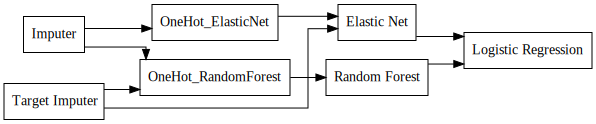

In [8]:
# Using a more involved component graph with more complex edges
component_dict = {
        "Imputer": ["Imputer", "X", "y"],
        "Target Imputer": ["Target Imputer", "X", "y"],
        "OneHot_RandomForest": ["One Hot Encoder", "Imputer.x", "Target Imputer.y"],
        "OneHot_ElasticNet": ["One Hot Encoder", "Imputer.x", "y"],
        "Random Forest": ["Random Forest Classifier", "OneHot_RandomForest.x", "y"],
        "Elastic Net": ["Elastic Net Classifier", "OneHot_ElasticNet.x", "Target Imputer.y"],
        "Logistic Regression": [
            "Logistic Regression Classifier",
            "Random Forest.x",
            "Elastic Net.x",
            "y",
        ],
}
cg = ComponentGraph(component_dict)
cg.graph()

## Component graph methods

Similar to the pipeline structure, we can call `fit`, `transform` and `predict`. We can also call `fit_features` which will fit all but the final component. This is useful in cases where you want to understand what transformed features are being passed into the last component, which is usually an estimator or model of interest.